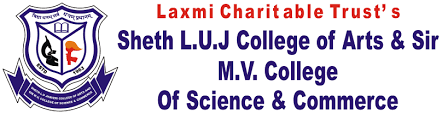

**RAM KUMAR SINGH   T118**

**Practical No. 2**  

Aim: Data Frames and Basic Data Pre-processing
Read data from CSV and JSON files into a data frame.
Perform basic data pre-processing tasks such as handling missing values and outliers.
Manipulate and transform data using functions like filtering, sorting, and grouping.

2.1 Loading a sample Dataset

In [ ]:
from string import digits
from sklearn import datasets

digits = datasets.load_digits()

features = digits.data

target = digits.target

features[0]


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

2.2 Creating a simulated dataset

In [ ]:
from sklearn.datasets import make_regression

features, target, coefficients = make_regression(n_samples = 100, n_features=3, n_informative=3, n_targets=1,noise=0.0,coef=True,random_state=1)

print("Features Matrix\n {}".format(features[:3]))
print("Target Vector\n{}".format(target[:3]))

Features Matrix
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]]
Target Vector
[-10.37865986  25.5124503   19.67705609]


In [ ]:
from sklearn.datasets import make_classification

features,target = make_classification(n_samples = 100, n_features=3, n_informative=3, n_redundant =0,n_classes = 2,weights = [.25 , .75],random_state=1)

print("Features Matrix\n {}".format(features[:3]))
print("Target Vector\n{}".format(target[:3]))

Features Matrix
 [[ 1.06354768 -1.42632219  1.02163151]
 [ 0.23156977  1.49535261  0.33251578]
 [ 0.15972951  0.83533515 -0.40869554]]
Target Vector
[1 0 0]


In [ ]:
from sklearn.datasets import make_blobs

features,target = make_blobs(n_samples = 100,n_features=2, centers = 3,cluster_std=0.5,shuffle=True,random_state=1)

print("Features Matrix\n {}".format(features[:3]))
print("Target Vector\n{}".format(target[:3]))


Features Matrix
 [[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]]
Target Vector
[0 1 1]


In [ ]:
#matploatlib

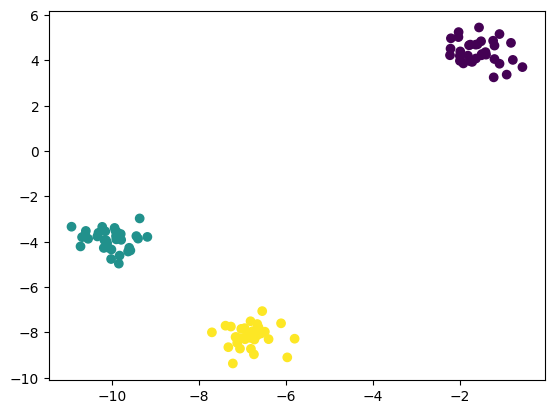

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(features[:,0],features[:,1],c=target)
plt.show()

2.3 Loading a CSV File

In [ ]:
import pandas as pd

df = pd.read_csv('heart.csv')
print(df.head())


   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   52    1   0       125   212    0  ...      0      1.0      2   2     3       0
1   53    1   0       140   203    1  ...      1      3.1      0   0     3       0
2   70    1   0       145   174    0  ...      1      2.6      0   0     3       0
3   61    1   0       148   203    0  ...      0      0.0      2   1     3       0
4   62    0   0       138   294    1  ...      0      1.9      1   3     2       0

[5 rows x 14 columns]


2.4 Loading an Excel File



In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('heart.xls', engine='xlrd')

# Display the first few rows
print(df.head())


   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   52    1   0       125   212    0  ...      0      1.0      2   2     3       0
1   53    1   0       140   203    1  ...      1      3.1      0   0     3       0
2   70    1   0       145   174    0  ...      1      2.6      0   0     3       0
3   61    1   0       148   203    0  ...      0      0.0      2   1     3       0
4   62    0   0       138   294    1  ...      0      1.9      1   3     2       0

[5 rows x 14 columns]


2.5 Loading a JSON File

In [ ]:
import pandas as pd

df = pd.read_json('heart.json')

print(df.head())


   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   52    1   0       125   212    0  ...      0      1.0      2   2     3       0
1   53    1   0       140   203    1  ...      1      3.1      0   0     3       0
2   70    1   0       145   174    0  ...      1      2.6      0   0     3       0
3   61    1   0       148   203    0  ...      0      0.0      2   1     3       0
4   62    0   0       138   294    1  ...      0      1.9      1   3     2       0

[5 rows x 14 columns]


2.6 Querying a SQL Database

In [ ]:
import sqlite3
import pandas as pd

data = {
    'age': [63, 67, 67, 37, 41],
    'sex': [1, 1, 1, 1, 0],
    'cp': [1, 4, 4, 3, 2],
    'trestbps': [145, 160, 120, 130, 130],
    'chol': [233, 286, 229, 250, 204],
    'target': [1, 1, 1, 1, 0]
}

df = pd.DataFrame(data)

conn = sqlite3.connect('heart.db')
df.to_sql('heart_data', conn, index=False, if_exists='replace')
conn.close()


In [ ]:
conn = sqlite3.connect('heart.db')
df = pd.read_sql_query("SELECT * FROM heart_data", conn)
print(df.head())
conn.close()


   age  sex  cp  trestbps  chol  target
0   63    1   1       145   233       1
1   67    1   4       160   286       1
2   67    1   4       120   229       1
3   37    1   3       130   250       1
4   41    0   2       130   204       0


In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('sakila.db')

cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables found:", tables)

df = pd.read_sql_query("SELECT * FROM film LIMIT 5", conn)
print(df)

conn.close()


Tables found: [('actor',), ('country',), ('city',), ('address',), ('language',), ('category',), ('customer',), ('film',), ('film_actor',), ('film_category',), ('film_text',), ('inventory',), ('staff',), ('store',), ('payment',), ('rental',)]
   film_id  ...          last_update
0        1  ...  2021-03-06 15:52:00
1        2  ...  2021-03-06 15:52:00
2        3  ...  2021-03-06 15:52:00
3        4  ...  2021-03-06 15:52:00
4        5  ...  2021-03-06 15:52:00

[5 rows x 13 columns]
